In [137]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from IPython.display import FileLink
from IPython.display import display
from IPython.display import Image
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer

from jupyter_jsmol import JsmolView
from jupyter_jsmol.pymatgen import quick_view

# Téléchargement du fichier CIF (cellule conventionnelle)

In [138]:
#Nous travaillons ici sur la cellule CONVENTIONNELLE standard du materiau

with MPRester("cG5llIAs5Ub9zbbJaG") as m:
    
    structure = m.get_structure_by_material_id("mp-961713", conventional_unit_cell = True)
    
    w = CifWriter(structure)
    w.write_file("mp-961713.cif")
    
    print("Cliquez sur le lien pour télécharger le fichier .CIF")
    display(FileLink("mp-961713.cif"))


Cliquez sur le lien pour télécharger le fichier .CIF


/home/users/c/m/cmoureau/mp-961713.cif

# Informations sur le fichier téléchargé

In [139]:
print(structure)

Full Formula (Zr4 Sn4 Pt4)
Reduced Formula: ZrSnPt
abc   :   6.422366   6.422366   6.422366
angles:  90.000000  90.000000  90.000000
Sites (12)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Zr    0.5   0     0
  1  Zr    0.5   0.5   0.5
  2  Zr    0     0     0.5
  3  Zr    0     0.5   0
  4  Sn    0     0     0
  5  Sn    0     0.5   0.5
  6  Sn    0.5   0     0.5
  7  Sn    0.5   0.5   0
  8  Pt    0.25  0.25  0.75
  9  Pt    0.25  0.75  0.25
 10  Pt    0.75  0.25  0.25
 11  Pt    0.75  0.75  0.75


# Symétrie n°1: Roto-inversion

La matrice de rotation associée à l'opération de symétrie est: 
[[ 0.  1.  0.]
 [-1.  0.  0.]
 [ 0.  0. -1.]]

Le vecteur de translation associé à l'opération de symétrie est: [0. 0. 0.]

Les coordonnées AVANT l'opération de symétrie de l'atome Zr1 sont: [0.5 0.5 0.5]

Les coordonnées APRES l'opération de symétrie de l'atome Zr1 sont: [ 0.5 -0.5 -0.5]



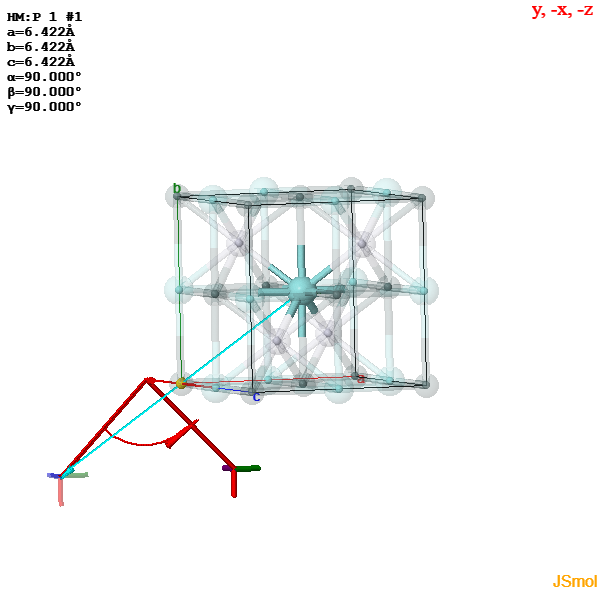

In [140]:
# Symétrie sur atome Zr
# Symétrien°1: Rotation d'ordre 4 (notation: 4/m) (x, y, z) -> (y, -x, -z)
sym1 = symetries[1]

print("La matrice de rotation associée à l'opération de symétrie est: ")
print(sym1.rotation_matrix)
print("\nLe vecteur de translation associé à l'opération de symétrie est: {}\n".format(sym1.translation_vector))

#Nous effectuons cette opération de symétrie sur l'atome Zr1
Zr1 = structure.sites[1].frac_coords
print("Les coordonnées AVANT l'opération de symétrie de l'atome Zr1 sont: {}\n".format(Zr1))

Zr1_sym = sym1.operate(Zr1)
print ("Les coordonnées APRES l'opération de symétrie de l'atome Zr1 sont: {}\n".format(Zr1_sym))

display(Image(filename='symetrie1_rot_inv.png'))

## Description
L'opération de symétrie transformant les coordonnées (x, y, z) en (y, -x, -z) est une rotation d'ordre 4 (= 90°) autour de l'axe de rotation qui est perpendiculaire au plan défini par les vecteurs (1,1,0) et (1,-1,0) suivie d'une inversion des coordonnées z et y.

L'équation (sous forme matricielle) de cette symétrie est:
$$\begin{pmatrix} 0 & 1 & 0 \\ -1 & 0 & 0 \\ 0 & 0 & -1\end{pmatrix} \begin{pmatrix} x \\ y \\ z\end{pmatrix} = \begin{pmatrix} y \\ -x \\ -z \end{pmatrix} $$



# Symétrie n°2: Plan miroir

La matrice de rotation associée à l'opération de symétrie est: 
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]

Le vecteur de translation associé à l'opération de symétrie est: [0. 0. 0.]

Les coordonnées AVANT l'opération de symétrie de l'atome Pt8 sont: [0.25 0.25 0.75]

Les coordonnées APRES l'opération de symétrie de l'atome Pt8 sont: [0.75 0.25 0.25]



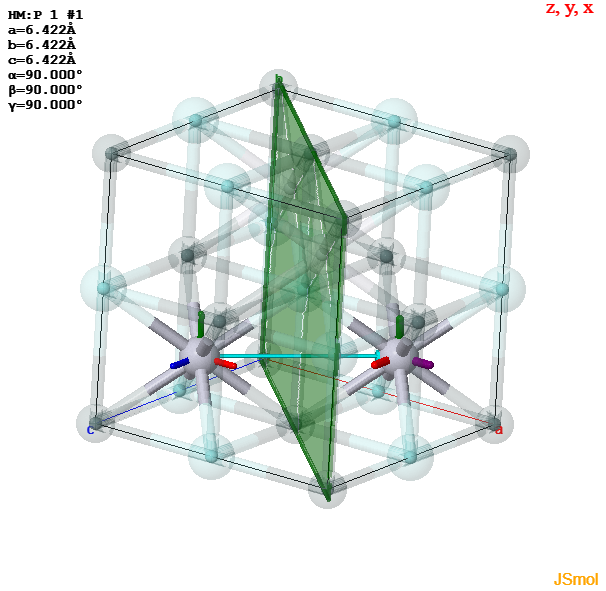

In [141]:
# Symétrie sur atome Pt
# Symétrien°2: Plan miroir (x, y, z) -> (z, y, x)

sym2 = symetries[13]

print("La matrice de rotation associée à l'opération de symétrie est: ")
print(sym2.rotation_matrix)
print("\nLe vecteur de translation associé à l'opération de symétrie est: {}\n".format(sym2.translation_vector))

#Nous effectuons cette opération de symétrie sur l'atome Pt8
Pt8 = structure.sites[8].frac_coords
print("Les coordonnées AVANT l'opération de symétrie de l'atome Pt8 sont: {}\n".format(Pt8))

Pt8_sym = sym2.operate(Pt8)
print ("Les coordonnées APRES l'opération de symétrie de l'atome Pt8 sont: {}\n".format(Pt8_sym))

display(Image(filename='symetrie2_miroir.png'))

## Description
L'opération de symétrie transformant les coordonnées (x, y, z) en (z, y, x) est une transformation avec un plan miroir.

L'équation (sous forme matricielle) de cette symétrie est:
$$\begin{pmatrix} 0 & 0 & 1 \\ 0 & 1 & 0 \\ 1 & 0 & 0\end{pmatrix} \begin{pmatrix} x \\ y \\ z\end{pmatrix} = \begin{pmatrix} z \\ y \\ x \end{pmatrix} $$

# Symétrie n°3: Rotation


La matrice de rotation associée à l'opération de symétrie est: 
[[-1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0. -1.]]

Le vecteur de translation associé à l'opération de symétrie est: [0. 0. 0.]

Les coordonnées AVANT l'opération de symétrie de l'atome Sn7 sont: [0.5 0.5 0. ]

Les coordonnées APRES l'opération de symétrie de l'atome Sn7 sont: [-0.5  0.5  0. ]



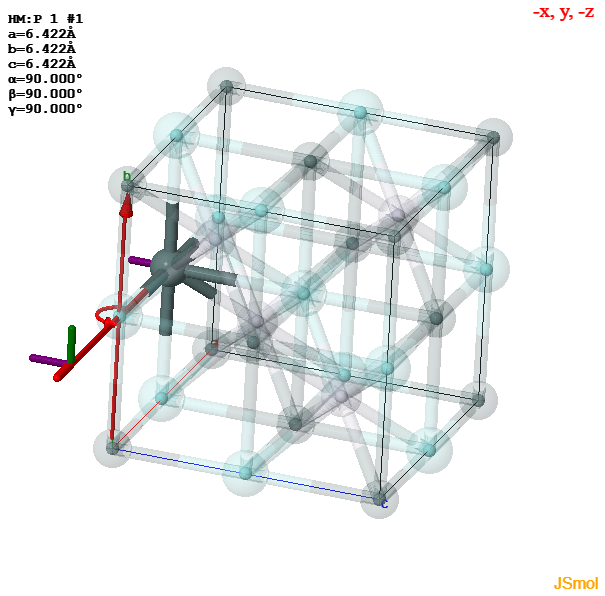

In [142]:
# Symétrie sur atome Sn
# Symétrien°3: Rotation ordre 2 (x, y, z) -> (-x, y, -z)

sym3 = symetries[6]

print("La matrice de rotation associée à l'opération de symétrie est: ")
print(sym3.rotation_matrix)
print("\nLe vecteur de translation associé à l'opération de symétrie est: {}\n".format(sym3.translation_vector))

#Nous effectuons cette opération de symétrie sur l'atome Pt8
Sn7 = structure.sites[7].frac_coords
print("Les coordonnées AVANT l'opération de symétrie de l'atome Sn7 sont: {}\n".format(Sn7))

Sn7_sym = sym3.operate(Sn7)
print ("Les coordonnées APRES l'opération de symétrie de l'atome Sn7 sont: {}\n".format(Sn7_sym))

display(Image(filename='symetrie3_rot.png'))

## Description
L'opération de symétrie transformant les coordonnées (x, y, z) en (-x, y, -z) est une rotation d'ordre 2 (= 180°) autour d'un axe de rotation (le vecteur b).

L'équation (sous forme matricielle) de cette symétrie est:
$$\begin{pmatrix} -1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & -1\end{pmatrix} \begin{pmatrix} x \\ y \\ z\end{pmatrix} = \begin{pmatrix} -x \\ y \\ -z \end{pmatrix} $$
